## **PROJECT PRESENTATION LINK :**

https://drive.google.com/file/d/13zDguVPNVv4SvSrAgw6K7YmSi3eXWtSv/view?usp=share_link

# ***IMPORTING THE LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
%matplotlib inline

# ***LOADING OF DATA***

In [ ]:
data = pd.read_excel("student-mat.xlsx",header = 0)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]
['U' 'R']
['GT3' 'LE3']
['A' 'T']
[4 1 3 2 0]
[4 1 2 3 0]
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
[2 1 3 4]
[2 3 1 4]
[0 3 2 1]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1  

In [ ]:
data['Sch_int'] = data.school.map({'GP':0, 'MS':1})
data['gender'] = data.sex.map({'F':0, 'M':1})
data['add_int'] = data.address.map({'U':0, 'R':1})
data['act_int'] = data.activities.map({'yes':0, 'no':1})
data['reason_int'] = data.reason.map({'home':0, 'reputation':1, 'course':2, 'other':3})
data['paid_int'] = data.paid.map({'yes':0, 'no':1})
data['schoolsup_int'] = data.schoolsup.map({'yes':0, 'no':1})
data['fs_int'] = data.famsize.map({'GT3':0, 'LE3':1})
data['ps_int'] = data.Pstatus.map({'A':0, 'T':1})
data['nur_int'] = data.nursery.map({'yes':0, 'no':1})
data['high_int'] = data.higher.map({'yes':0, 'no':1})
data['int_int'] = data.internet.map({'yes':0, 'no':1})
data['rom_int'] = data.romantic.map({'yes':0, 'no':1})
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,act_int,reason_int,paid_int,schoolsup_int,fs_int,ps_int,nur_int,high_int,int_int,rom_int
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,2,1,0,0,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,2,1,1,0,1,1,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,3,0,0,1,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,1,0,1,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,2,0,1,1,0,0,0,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,1,2,1,1,1,1,1,0,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,2,1,1,0,1,1,0,1,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,2,1,1,1,1,1,0,0,1


In [ ]:
a = data[{"Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2",'G3'}]
a

,G1,health,absences,schoolsup_int,paid_int,act_int,reason_int,G2,Sch_int,G3,studytime,add_int,gender,failures
0,5,3,6,0,1,1,2,6,0,6,2,0,0,0
1,5,3,4,1,1,1,2,5,0,6,2,0,0,0
2,7,3,10,0,0,1,3,8,0,10,2,0,0,3
3,15,5,2,1,0,0,0,14,0,15,3,0,0,0
4,6,5,4,1,0,1,0,10,0,10,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,4,11,1,0,1,2,9,1,9,2,0,1,2
391,14,2,3,1,1,1,2,16,1,16,1,0,1,0
392,10,3,3,1,1,1,2,8,1,7,1,1,1,3
393,11,5,0,1,1,1,2,12,1,10,1,1,1,0


# ***EDA***

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


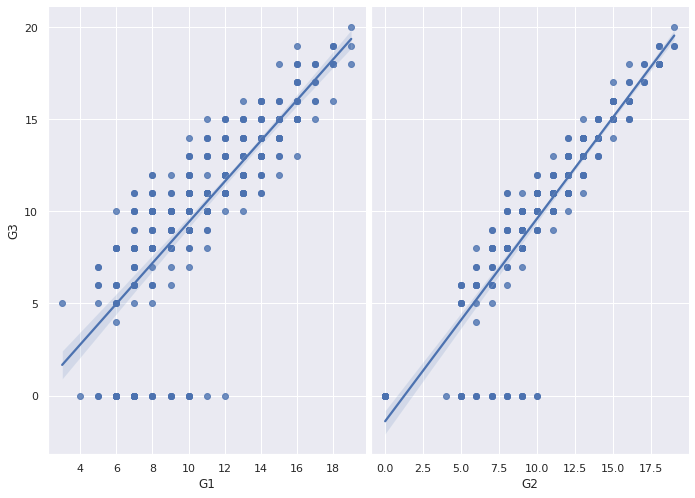

In [ ]:
sns.pairplot(data, x_vars=['G1','G2'], y_vars='G3', size=7, aspect=0.7, kind='reg')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


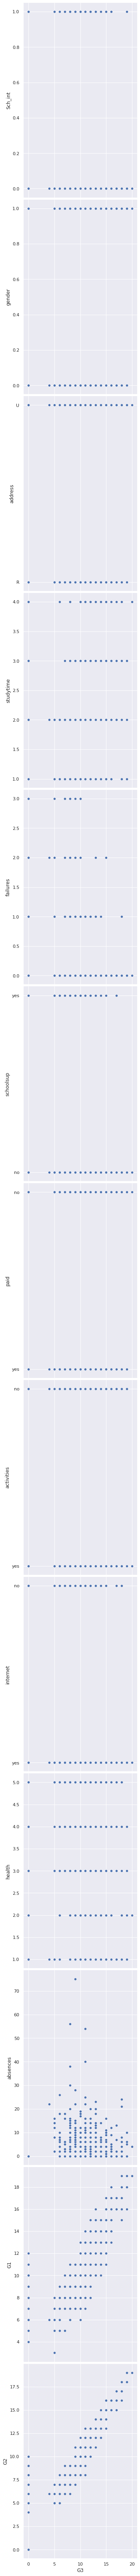

In [ ]:
sns.pairplot(data, y_vars=['Sch_int','gender','address','studytime','failures','schoolsup','paid','activities','internet','health','absences','G1','G2'], x_vars='G3',size=7, aspect=0.7)

In [ ]:
c=data.groupby("school")["sex"].count()
c

school
GP    349
MS     46
Name: sex, dtype: int64

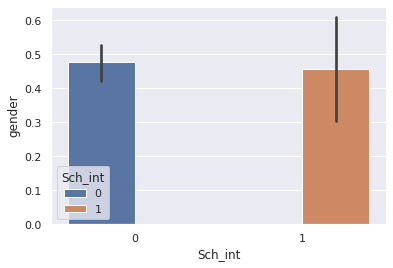

In [ ]:
sns.barplot(x='Sch_int',y='gender',data=data,hue ='Sch_int')

In [ ]:
z = pd.crosstab(index=data['Sch_int'], columns=data['gender'])
z

gender,0,1
Sch_int,,
0,183,166
1,25,21


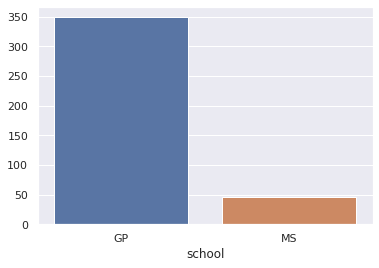

In [ ]:
sns.barplot(x=c.index,y=c.values)

In [ ]:
d=data.groupby("sex")["sex"].count()
d

sex
F    208
M    187
Name: sex, dtype: int64

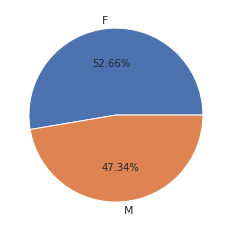

In [ ]:
plt.pie(d,labels=d.index,autopct="%.2f%%", explode=[0,0]);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


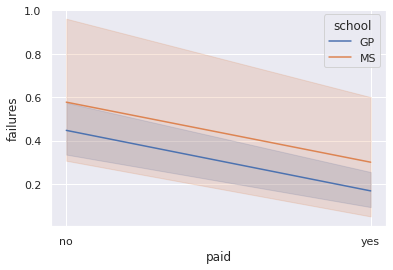

In [ ]:
sns.lineplot('paid','failures', data=data, hue='school');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


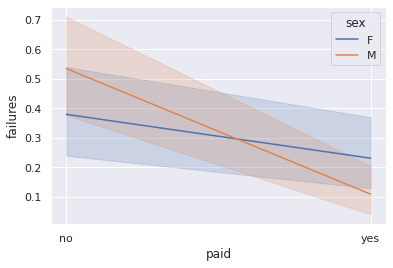

In [ ]:
sns.lineplot('paid','failures', data=data, hue='sex');

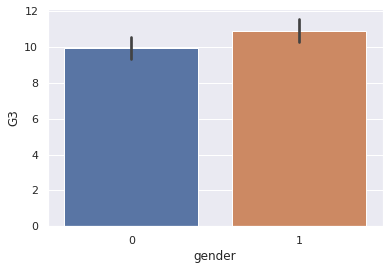

In [ ]:
sns.barplot(x="gender",y = "G3" , data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


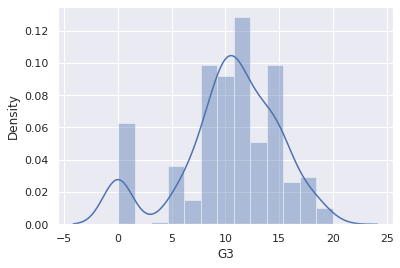

In [ ]:
sns.distplot(data.G3)

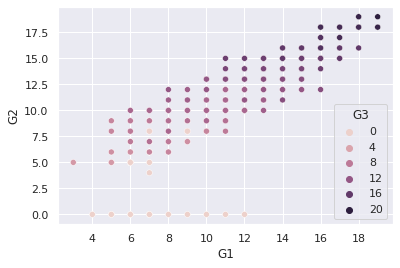

In [ ]:
sns.scatterplot(x=data['G1'],y=data['G2'],hue=data['G3'])

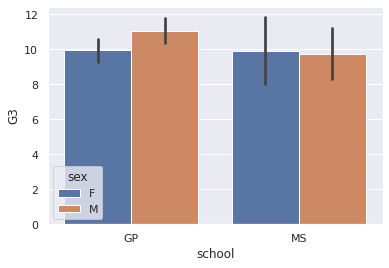

In [ ]:
sns.barplot(x="school",y = "G3" , data=data, hue='sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


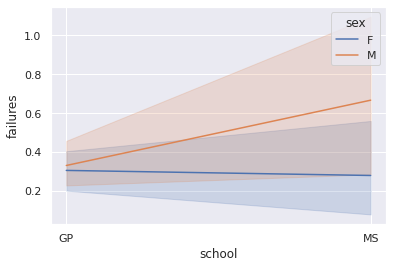

In [ ]:
sns.lineplot('school','failures', data=data, hue='sex');

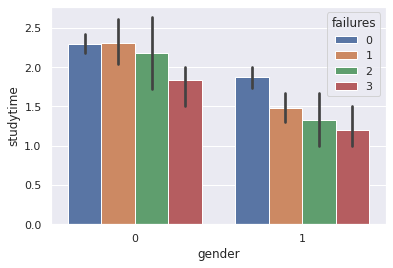

In [ ]:
sns.barplot(x="gender",y = "studytime" , data=data, hue='failures')

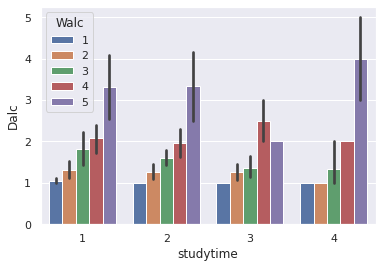

In [ ]:
sns.barplot(x="studytime",y = "Dalc" , data=data,hue="Walc")

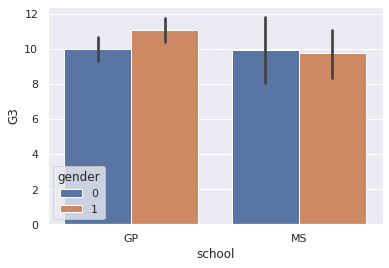

In [ ]:
sns.barplot(x="school",y = "G3" , data=data,hue='gender')


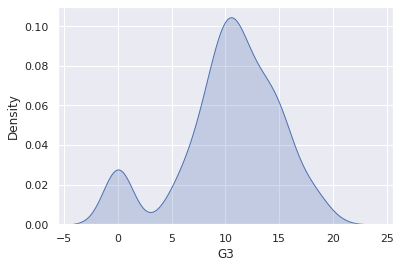

In [ ]:
sns.kdeplot(data.G3, shade=True)

In [ ]:
np.mean(data.G1)

10.90886075949367

In [ ]:
np.mean(data.G2)

10.713924050632912

In [ ]:
np.mean(data.G3)

10.415189873417722

In [ ]:
import matplotlib.pyplot as plt 

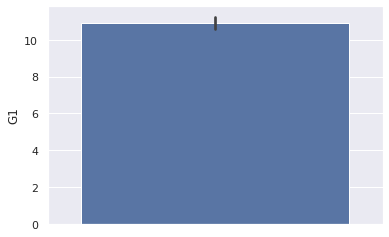

In [ ]:
sns.barplot(y = data.G1)

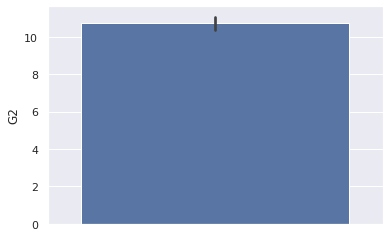

In [ ]:
sns.barplot(y = data.G2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


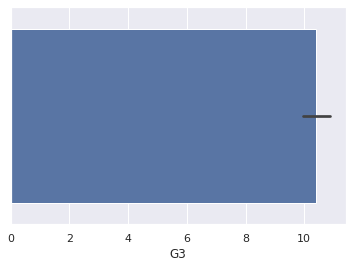

In [ ]:
sns.barplot(data.G3)

# ***PREDICTIVE ANALYSIS***

## ***LINEAR REGRESSION***

In [ ]:
lm3 = smf.ols(formula='G3 ~ Sch_int+gender+add_int+reason_int+studytime+failures+schoolsup_int+paid_int+act_int+health+absences+G1+G2', data=data).fit()
lm3.params 

Intercept       -1.892788
Sch_int          0.065265
gender           0.248612
add_int          0.027831
reason_int       0.123367
studytime       -0.120276
failures        -0.269688
schoolsup_int   -0.605915
paid_int        -0.154515
act_int          0.324360
health           0.088296
absences         0.039895
G1               0.176712
G2               0.964827
dtype: float64

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          2.77e-139
Time:                        04:55:56   Log-Likelihood:                -807.29
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     381   BIC:                             1698.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8928      0.598     -3.167      0.002      -3.068      -0.718
Sch_int           0.0653      0.322      0.203      0.839      -0.568       0.698
gender            0.2486      0.211      1.179      0.239      -0.166       0.663
add_int           0.0278      0.246      0.113      0.910      -0.455       0.511
reason_int        0.1234      0.102      1.207      0.228      -0.078       0.324
studytime        -0.1203      0.126     -0.951      0.342      -0.369       0.128
failures         -0.2697      0.143     -1.890      0.059      -0.550       0.011
schoolsup_int    -0.6059      0.302     -2.009      0.045      -1.199      -0.013
paid_int         -0.1545      0.201     -0.768      0.443      -0.550       0.241
act_int           0.3244      0.196      1.652      0.099      -0.062       0.710
health            0.0883      0.071      1.252      0.211      -0.050       0.227
absences          0.0399      0.012      3.251      0.001       0.016       0.064
G1                0.1767      0.058      3.057      0.002       0.063       0.290
G2                0.9648      0.050     19.206      0.000       0.866       1.064
==============================================================================
Omnibus:                      202.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.945
Skew:                          -2.212   Prob(JB):                    2.33e-239
Kurtosis:                       9.871   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Fitting the linear regression with considering G1 and G2 variables**

In [ ]:
X = data[["Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2"]]
y = data.G3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm3 = LinearRegression()
lm3.fit(X_train, y_train)
y_pred = lm3.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.6384051763809078


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_test, y_pred)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_test, y_pred)              ##R-squared (Coefficient of determination)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

1.1789113518185959
2.6843715219917534
1.6384051763809078
0.8691116321440738
96.78872585429342


***Fitting the linear regression without considering G1 and G2 variables***

In [ ]:
X = data[["Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences"]]
y = data.G3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm3 = LinearRegression()
lm3.fit(X_train, y_train)
y_pred = lm3.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.067620021663556


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_test, y_pred)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_test, y_pred)              ##R-squared (Coefficient of determination)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

3.539336045595072
20.71353768528408
4.551212770820991
0.1539581336095327
91.07962296919086


***Fitting the linear regression with only G1 G2 and absences variables***

In [ ]:
lm_hm = smf.ols(formula='G3 ~ absences+G1+G2', data=data).fit()
lm_hm.params

Intercept   -2.067468
absences     0.036354
G1           0.154525
G2           0.988380
dtype: float64

In [ ]:
lm_hm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     619.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.90e-148
Time:                        10:43:28   Log-Likelihood:                -815.59
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     391   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0675      0.341     -6.060      0.000      -2.738      -1.397
absences       0.0364      0.012      3.010      0.003       0.013       0.060
G1             0.1545      0.056      2.779      0.006       0.045       0.264
G2             0.9884      0.049     20.142      0.000       0.892       1.085
==============================================================================
Omnibus:                      228.806   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.871
Skew:                          -2.493   Prob(JB):                         0.00
Kurtosis:                      11.046   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ***NEURAL NETWORKS***

In [ ]:
x= a.drop("G3", axis=1)
y=a["G3"]
x.head

<bound method NDFrame.head of      studytime  G1  absences  failures  Sch_int  act_int  schoolsup_int  \
0            2   5         6         0        0        1              0   
1            2   5         4         0        0        1              1   
2            2   7        10         3        0        1              0   
3            3  15         2         0        0        0              1   
4            2   6         4         0        0        1              1   
..         ...  ..       ...       ...      ...      ...            ...   
390          2   9        11         2        1        1              1   
391          1  14         3         0        1        1              1   
392          1  10         3         3        1        1              1   
393          1  11         0         0        1        1              1   
394          1   8         5         0        1        1              1   

     add_int  reason_int  paid_int  health  G2  gender  
0          0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=42)
y_test

78     10
371    12
248     5
55     10
390     9
       ..
281    10
245    18
250     8
218     8
109    16
Name: G3, Length: 119, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae']
              )

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 200, verbose=0)

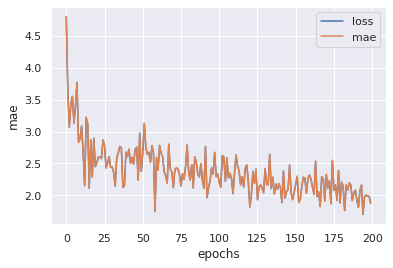

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.2988 - mae: 1.2988


[1.2988437414169312, 1.2988437414169312]

## ***BAGGING***

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
bgr = BaggingRegressor(n_estimators=100, random_state=1)
bgr.fit(x_train, y_train)

BaggingRegressor(n_estimators=100, random_state=1)

In [ ]:
bgr.score(x_test, y_test)

0.8053875261776013

In [ ]:
mae = metrics.mean_absolute_error(y_test, bgr.predict(x_test)) 
print(mae)

1.2254430379746837


## ***BOOSTING***

### ***ADAPTIVE*** ***BOOSTING***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
# Create adaboost classifer object
abc = AdaBoostRegressor(n_estimators=100,
                         learning_rate=0.6)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)
model.score(x_test, y_test)

0.8437913693735604

In [ ]:
mae = metrics.mean_absolute_error(y_test, model.predict(x_test)) 
print(mae)

1.168958905312088


### ***GRADIENT BOOSTING*** 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.6,max_depth=1,
 random_state=0).fit(x_train, y_train)
reg.score(x_test, y_test)

0.8180597501318607

In [ ]:
mae = metrics.mean_absolute_error(y_test, reg.predict(x_test)) 
print(mae)

1.442962140534077


### ***XG BOOSTING***

In [ ]:
from xgboost import XGBRegressor

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

[13:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
mae = metrics.mean_absolute_error(y_test, xgbr.predict(x_test)) 
print(mae)

1.1758924301224525


In [ ]:
xgbr.score(x_test, y_test)

0.8455633004068648

In [ ]:
x= a.drop("G3", axis=1)
y=a["G3"]
x.head

<bound method NDFrame.head of      gender  studytime  absences  paid_int  act_int  add_int  Sch_int  G1  \
0         0          2         6         1        1        0        0   5   
1         0          2         4         1        1        0        0   5   
2         0          2        10         0        1        0        0   7   
3         0          3         2         0        0        0        0  15   
4         0          2         4         0        1        0        0   6   
..      ...        ...       ...       ...      ...      ...      ...  ..   
390       1          2        11         0        1        0        1   9   
391       1          1         3         1        1        0        1  14   
392       1          1         3         1        1        1        1  10   
393       1          1         0         1        1        1        1  11   
394       1          1         5         1        1        0        1   8   

     reason_int  health  schoolsup_int  G2  f

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=42)
y_test

78     10
371    12
248     5
55     10
390     9
       ..
281    10
245    18
250     8
218     8
109    16
Name: G3, Length: 119, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0543 - mae: 1.0543


[1.0543289184570312, 1.0543289184570312]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=42)
y_test

78     10
371    12
248     5
55     10
390     9
       ..
281    10
245    18
250     8
218     8
109    16
Name: G3, Length: 119, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 20, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.2687 - mae: 1.2687


[1.2687360048294067, 1.2687360048294067]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 50, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.1256 - mae: 1.1256


[1.1256110668182373, 1.1256110668182373]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0543 - mae: 1.0543


[1.0543289184570312, 1.0543289184570312]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 3.3357 - mae: 3.3357


[3.335735321044922, 3.335735321044922]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0484 - mae: 1.0484


[1.0483615398406982, 1.0483615398406982]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0498 - mae: 1.0498


[1.0497872829437256, 1.0497872829437256]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
                            
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)                           
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 20, verbose=0)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 20, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.2033 - mae: 1.2033


[1.2033109664916992, 1.2033109664916992]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 50, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.1023 - mae: 1.1023


[1.1023318767547607, 1.1023318767547607]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=42)
y_test

78     10
371    12
248     5
55     10
390     9
       ..
281    10
245    18
250     8
218     8
109    16
Name: G3, Length: 119, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.4161 - mae: 1.4161


[1.4161311388015747, 1.4161311388015747]

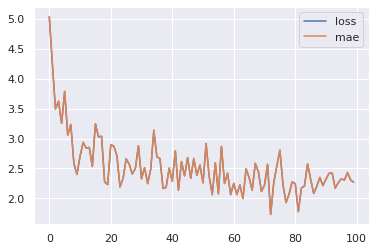

In [ ]:
pd.DataFrame(h3.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.8740 - mae: 1.8740


[1.8740311861038208, 1.8740311861038208]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 5ms/step - loss: 1.0825 - mae: 1.0825


[1.0825443267822266, 1.0825443267822266]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )

# STEP3: Fit the model

h3= model.fit(x_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0390 - mae: 1.0390


[1.0389889478683472, 1.0389889478683472]